$$ \LaTeX \text{ command declarations here.}
\newcommand{\R}{\mathbb{R}}
\renewcommand{\vec}[1]{\mathbf{#1}}
\newcommand{\X}{\mathcal{X}}
\newcommand{\D}{\mathcal{D}}
$$

In [1]:
from __future__ import division

# plotting
%matplotlib inline
from matplotlib import pyplot as plt;

# scientific
import numpy as np;

# ipython
from IPython.display import Image

# EECS 545:  Machine Learning
## Lecture 13:  Information Theory and Exponential Families
* Instructor:  **Jacob Abernethy**
* Date:  March 7, 2016

*Lecture Exposition Credit:*  Benjamin Bray & Saket Dewaligan

## References

Information Theory:

- **[Shannon 1951]** Shannon, Claude E.. [*The Mathematical Theory of Communication*](http://worrydream.com/refs/Shannon%20-%20A%20Mathematical%20Theory%20of%20Communication.pdf).  1951.
- **[Pierce 1980]** Pierce, John R..  [*An Introduction to Information Theory:  Symbols, Signals, and Noise*](http://www.amazon.com/An-Introduction-Information-Theory-Mathematics/dp/0486240614).  1980.
- **[Stone 2015]** Stone, James V..  [*Information Theory:  A Tutorial Introduction*](http://jim-stone.staff.shef.ac.uk/BookInfoTheory/InfoTheoryBookMain.html).  2015.

## References

Exponential Families:

- **[MLAPP]** Murphy, Kevin. [*Machine Learning:  A Probabilistic Perspective*](https://mitpress.mit.edu/books/machine-learning-0).  2012.
- **[Hero 2008]** Hero, Alfred O..  [*Statistical Methods for Signal Processing*](http://web.eecs.umich.edu/~hero/Preprints/main_564_08_new.pdf).  2008.
- **[Blei 2011]** Blei, David. [*Notes on Exponential Families*](https://www.cs.princeton.edu/courses/archive/fall11/cos597C/lectures/exponential-families.pdf).  2011.

## Outline

This lecture, we introduce some important background for **Probabilistic Graphical Models**.

* Information Theory
    - Information, Entropy, and Encoding
    - Relative Entropy, Mutual Information & Collocations
    - Maximum Entropy Distributions
* Exponential Family
    - Mean and Natural Parameterizations
    - Conjugate Priors & Maximum Likelihood

# Information Theory

> Uses material from **[MLAPP]** §2.8, **[Pierce 1980]**, **[Stone 2015]**, and **[Shannon 1951]**.

### Information Theory

Information theory is concerned with
- **Compression:**  Representing data in a compact fashion
- **Error Correction:**  Transmitting and storing data in a way that is robust to errors

In machine learning, information-theoretic quantities are useful for
- manipulating probability distributions
- interpreting statistical learning algorithms

### What is Information?

Can we measure the amount of **information** we gain from an observation?
- Information is measured in *bits* ( don't confuse with *binary digits*, $0110001\dots$ )
- Intuitively, observing a fair coin flip should give 1 bit of information
- Observing two fair coints should give 2 bits, and so on...

### Information:  Definition

The **information content** of an event $E$ with probability $p$ is
$$
I(E) = I(p) = - \log_2 p = \log_2 \frac{1}{p} \geq 0
$$

- Information theory is about *probabilities* and *distributions*
- The "meaning" of events doesn't matter.
- Using bases other than 2 yields different units (Hartleys, nats, ...)

### Example:  Fair Coin

**One Coin:**  If $P(Heads)=0.5$ and we observe heads, then
$$
I(Heads) = - \log_2 P(Heads) = 1 \;\mathrm{bit}
$$

**Two Coins:** If we observe two heads in a row, 
$$
\begin{align}
I(Heads,Heads)
&= -\log_2 P(Heads, Heads) \\
&= -\log_2 P(Heads)P(Heads) \\
&= -\log_2 P(Heads) - \log_2 P(Heads) = 2 \;\mathrm{bits}
\end{align}
$$

### Example:  Unfair Coin

Suppose the coin has two heads, so $P(H)=1$.  Then,
$$
I(Heads) = - \log_2 1 = 0
$$

If we know the coin is unfair, we gain no information by observing heads!
- Information is a measure of how **surprised** we are by an outcome.
- Observing heads when $P(H)=0$ yields *infinite* information.

### Entropy:  Definition

The **entropy** of a discrete random variable $X$ with distribution $p$ is
$$
H[X] = H[p] = E[I(p(X))] = - \sum_{x \in X} p(x) \log p(x)
$$

Entropy is the expected information received when we sample from $X$.
- How *surprised* are we, on average?

### Entropy:  Coin Flip

If $X$ is binary, $H[X] = -[ p \log p + (1-p) \log (1-p) ]$

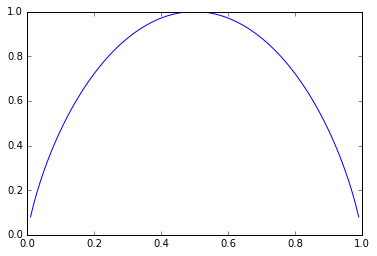

In [2]:
p = np.linspace(0.01,0.99,100);
plt.plot(p, -(p * np.log(p) + (1-p)*np.log(1-p)) / np.log(2));

### Entropy & Surprisal

Entropy is highest when $X$ is close to uniform.
- Large entropy $\iff$ high uncertainty, more information from each new observation
- Low entropy $\iff$ more knowledge about possible outcomes

The farther from uniform $X$ is, the lower the entropy.

### Maximum Entropy Principle

Suppose we sample data from an unknown distribution $p$, and
- we collect statistics (mean, variance, etc.) from the data
- we want an *objective* or unbiased estimate of $p$

The **Maximum Entropy Principle** states that:

> We should choose $p$ to have maximum entropy $H[p]$ among all distributions satisfying our constraints.

### Maximum Entropy:  Examples

Some examples of maximum entropy distributions:

<table>
<thead><th>Constraints</th><th>Maximum Entropy Distribution</th></thead>
<tbody>
    <tr><td>Min $a$, Max $b$</td><td>Uniform $U[a,b]$</td></tr>
    <tr><td>Mean $\mu$, Support $(0,+\infty)$</td><td>Exponential $Exp(\mu)$</td></tr>
    <tr><td>Variance $\sigma^2$</td><td>Gaussian $\mathcal{N}(\mu, \sigma^2)$</td></tr>
</tbody>
</table>

Later, **Exponential Family Distributions** will generalize this concept.

### Communication Channels

For some intuition, consider a **communication channel**:
1. The **source** generates messages.
2. An **encoder** converts the message to a **signal** for transmission.
3. Signals are transmitted along a **channel**, possibly under the influence of **noise**.
4. A **decoder** attempts to reconstruct the original message from the transmitted signal.
5. The **destination** is the intended recipient.

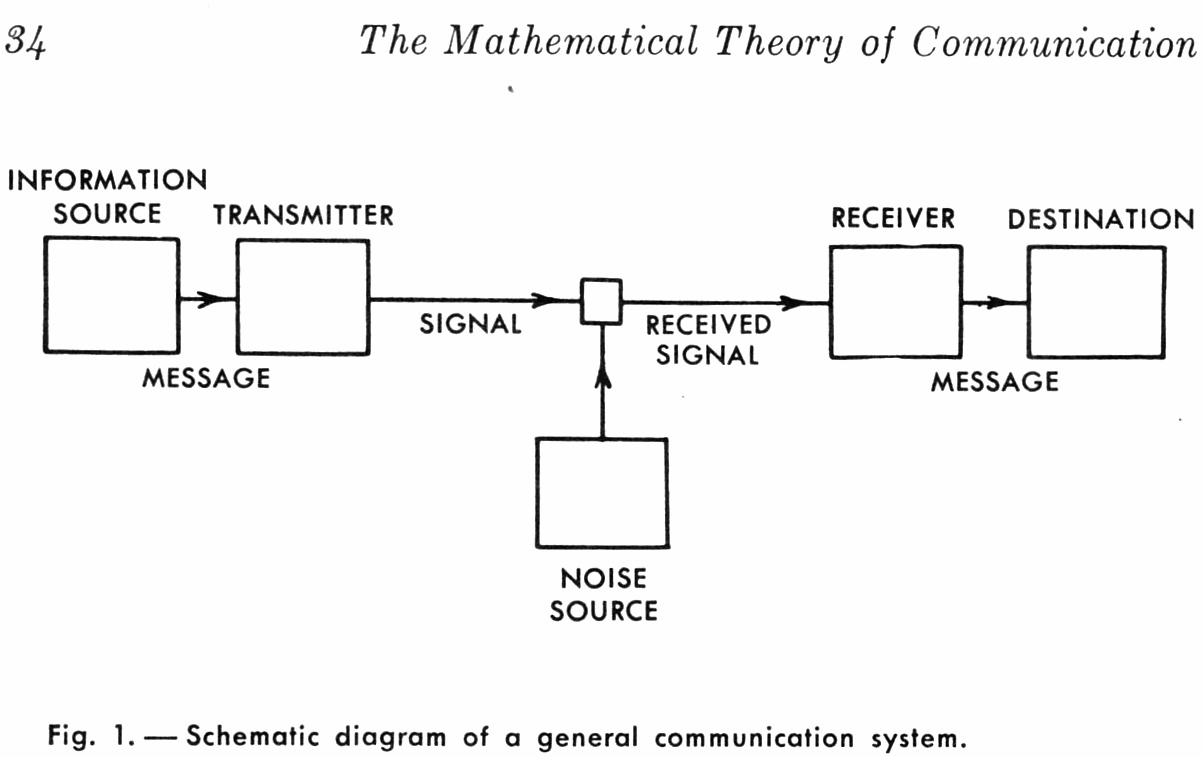

In [3]:
Image(filename="images/shannon_comm_channel.jpg")

### Encoding

Suppose we draw messages from a distribution $p$.
- Certain messages may be more likely than others.
- For example, the letter $e$ is most frequent in English

An **efficient** encoding minimizes the average message length,
- assign *short* codewords to common messages
- and *longer* codewords to rare messages

<div style="margin: 10px auto; max-width: 400px; color:red">
**Note to Jake:** I didn't want to put this on a slide, but you might want to mention the story of how Morse came up with his code.
<br><br>
At the time, newspaper printers had tiny metal copies of each letter, used for printing.  Morse apparently reasoned that they would have only as many copies of each letter as necessary to print a page, so he counted the number of copies of each letter they had and used that to estimate English letter frequencies.
</div>

### Encoding:  Morse Code

This is precisely how **Morse Code** works!
> Approximates **Huffman Coding**, which gives optimal binary codes.

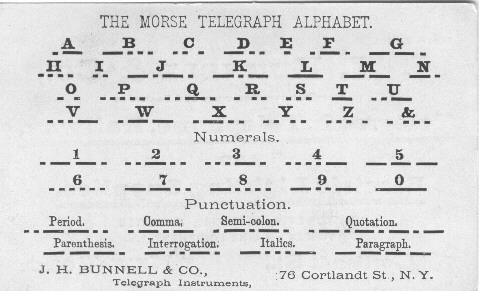

In [4]:
Image(filename="images/morse-code.jpg")

### Source Coding Theorem

Claude Shannon proved that for discrete noiseless channels:

> It is impossible to encode messages drawn from a distribution $p$ with fewer than $H[p]$ bits, on average.

Here, *bits* refers to *binary digits*, i.e. encoding messages in binary.
> $H[p]$ measures the optimal code length, in bits, for messages drawn from $p$

### Cross Entropy & Relative Entropy

Consider different distributions $p$ and $q$
- What if we use a code optimal for $q$ to encode messages from $p$?

For example, suppose our encoding scheme is optimal for German text.
- What if we send English messages instead?
- Certainly, there will be some waste due to different letter frequencies, umlauts, ...

### Cross Entropy

The **cross entropy** measures the average number of bits needed to encode messages drawn from $p$ when we use a code optimal for $q$:
$$
H(p,q) = -\sum_{x \in \X} p(x) \log q(x)
= - E_p[\log q(x)]
$$

Intuitively, $H(p,q) \geq H(p)$.  The **relative entropy** is the difference $H(p,q) - H(p)$.

### Relative Entropy:  Definition

The **relative entropy** or **Kullback-Leibler divergence** of $q$ from $p$ is

$$
\begin{align}
D_{KL}(p || q)
&= \sum_{x \in X} p(x) \log \frac{p(x)}{q(x)} \\
&= H(p,q) - H(p)
\end{align}
$$

> Measures the number of *extra* bits needed to encode messages from $p$ if we use a code optimal for $q$.

### Mutual Information:  Definition

The **mutual information** between discrete variables $X$ and $Y$ is
$$\begin{align}
I(X; Y)
&= \sum_{y\in Y} \sum_{x \in X} p(x,y) \log\frac{p(x,y)}{p(x)p(y)} \\
&= D_{KL}( p(x,y) || p(x)p(y) )
\end{align}$$

- If $X$ and $Y$ are independent, $p(x,y)=p(x)p(y)$
- So, $I(X;Y)$ measures how *independent* $X$ and $Y$ are!
- Related to correlation $\rho(X,Y)$

### Example:  Collocations & PMI

A **collocation** is a sequence of words that co-occur more often than expected by chance.
- fixed expression familiar to native speakers (hard to translate)
- meaning of the whole is more than the sum of its parts

> See [these slides](https://www.eecis.udel.edu/~trnka/CISC889-11S/lectures/philip-pmi.pdf) for more details

### Example:  Collocation & PMI

Substituting a synonym sounds unnatural:
- "fast food" vs. "quick food"
- "Great Britain" vs. "Good Britain"
- "warm greetings" vs "hot greetings"

> How can we find collocations in a corpus of text?

### Example:  Collocations & PMI

The **pointwise mutual information** between words $x$ and $y$ is
$$
\mathrm{pmi}(x;y) = \log \frac{p(x,y)}{p(x)p(y)}
$$

- $p(x)p(y)$ is how frequently we **expect** $x$ and $y$ to co-occur, if they do so independently.
- $p(x,y)$ measures how frequently $x$ and $y$ **actually** occur together

### Example:  Collocations & PMI

**Idea:**  Rank word pairs by $\mathrm{pmi}(x,y)$ to find collocations!
- $\mathrm{pmi}(x,y)$ is large if $x$ and $y$ co-occur more frequently together than expected

**Code:** Let's try it on the novel *Crime and Punishment*!
- Pre-computed unigram and bigram counts are found in the `collocations/data` folder

### Example:  Collocations & PMI

Here we read in the precomputed data.  See the notebook in the `collocations` folder for a full implementation.

In [5]:
import csv, math;

# file paths
unigram_path = "collocations/data/crime-and-punishment.txt.unigrams";
bigram_path = "collocations/data/crime-and-punishment.txt.bigrams";

# read unigrams into dict
with open(unigram_path) as f:
    reader = csv.reader(f);
    unigrams = { row[0] : int(row[1]) for row in csv.reader(f)};
    
# read bigrams into dict
with open(bigram_path) as f:
    reader = csv.reader(f);
    bigrams = { (row[0],row[1]) : int(row[2]) for row in csv.reader(f)};

# pretty print table
class PrettyTable(object):
        def __init__(self, data, head1, head2, floats=False):
            table = "<table>"
            table += "<thead><th>%s</th><th>%s</th></thead>\n" % (head1,head2);
            table += "<tbody>\n"
            for bigram,count in data:
                if floats: count = "%0.2f" % count;
                else: count = "%d" % count;

                table += "<tr>"
                table += "<td>%s %s</td>" % bigram;
                table += "<td>%s</td>" % count;
                table += "</tr>\n";

            table += "</tbody></table>"
            self.table = table;
        
        def _repr_html_(self):
            return self.table;

### Example:  Collocations & PMI

The following code sorts bigrams by pointwise mutual information:

In [6]:
# compute pmi
pmi_bigrams = [];

for w1,w2 in bigrams:
    # compute pmi
    actual = bigrams[(w1,w2)];
    expected = unigrams[w1] * unigrams[w2];
    pmi = math.log( actual / expected );
    # filter out infrequent bigrams
    if actual < 15: continue;
    pmi_bigrams.append( ((w1, w2), pmi) );

# sort pmi
pmi_sorted = sorted(pmi_bigrams, key=lambda x: x[1], reverse=True);

### Example:  Collocations & PMI

Here are the most frequent bigrams--these aren't collocations!

In [7]:
bigrams_sorted = sorted(bigrams.items(), key=lambda x: x[1], reverse=True);
PrettyTable(bigrams_sorted[:10], "Bigram", "Count")

in the,778
of the,598
he was,505
he had,498
to the,488
on the,479
i am,460
at the,459
it was,413
that he,335


### Example:  Collocations & PMI

Sorting bigrams by PMI, we first get names...

In [8]:
PrettyTable(pmi_sorted[1:10], "Collocation", "PMI", floats=True)

andrey semyonovitch,-3.18
nikodim fomitch,-3.18
hay market,-3.48
dmitri prokofitch,-3.87
honoured sir,-4.27
sofya semyonovna,-4.33
marfa petrovna,-4.37
police station,-4.48
rodion romanovitch,-4.57


### Example:  Collocations & PMI

...then more interesting collocations!  This is much more useful than sorting by frequency alone.

In [9]:
PrettyTable(pmi_sorted[12:20], "Collocation", "PMI", floats=True)

thank god,-5.20
police office,-5.23
great deal,-5.28
ten minutes,-5.40
good heavens,-5.51
thousand roubles,-5.54
katerina ivanovnas,-5.57
old womans,-5.57


### Example:  Feature Selection

Mutual information can also be used for **feature selection**.
- In classification, features that *depend* most on the class label $C$ are useful
- So, choose features $X_k$ such that $I(X_k ; C)$ is large
- This helps to avoid *overfitting* by ignoring irrelevant features!

> See **[MLAPP]** §3.5.4 for more information

# Exponential Families

> Uses material from **[MLAPP]** §9.2 and **[Hero 2008]** §3.5, §4.4.2

### Exponential Family: Introduction

We have seen many distributions.
* Bernoulli
* Gaussian
* Exponential
* Gamma 
    
Many of these belong to a more general class called the **exponential family**.

### Exponential Family:  Introduction

Why do we care?
* only family of distributions with finite-dimensional **sufficient statistics**
* only family of distributions for which **conjugate priors** exist
* makes the least set of assumptions subject to some user-chosen constraints (**Maximum Entropy**)
* core of generalized linear models and **variational inference**

### Sufficient Statistics

**Recall:** A **statistic** $T(\D)$ is a function of the observed data $\D$.
- Mean, $T(x_1, \dots, x_n) = \frac{1}{n}\sum_{k=1}^n x_k$
- Variance, maximum, mode, etc.

### Sufficient Statistics:  Definition

Suppose we have a model $P$ with parameters $\theta$.  Then,

> A statistic $T(\D)$ is **sufficient** for $\theta$ if no other statistic calculated from the same sample provides any additional information about the parameter.

That is, if $T(\D_1) = T(\D_2)$, our estimate of $\theta$ given $\D_1$ or $\D_2$ will be the same.
- Mathematically, $P(\theta | T(\D), \D) = P(\theta | T(\D))$ independently of $\D$

### Sufficient Statistics:  Example

Suppose $X \sim \mathcal{N}(\mu, \sigma^2)$ and we observe $\mathcal{D} = (x_1, \dots, x_n)$.  Let
- $\hat\mu$ be the sample mean
- $\hat{\sigma}^2$ be the sample variance

Then $T(\mathcal{D}) = (\hat\mu, \hat{\sigma}^2)$ is sufficient for $\theta=(\mu, \sigma^2)$.
- Two samples $\D_1$ and $\D_2$ with the same mean and variance give the same estimate of $\theta$

<span style="color:gray">(we are sweeping some details under the rug)</span>

### Exponential Family:  Definition

$p(x | \theta)$ has **exponential family form** if:
$$
\begin{align}
p(x | \theta)
&= \frac{1}{Z(\theta)} h(x) \exp\left[ \eta(\theta)^T \phi(x) \right] \\
&= h(x) \exp\left[ \eta(\theta)^T \phi(x) - A(\theta) \right]
\end{align}
$$

- $Z(\theta)$ is the **partition function** for normalization
- $A(\theta) = \log Z(\theta)$ is the **log partition function**
- $\phi(x) \in \R^d$ is a vector of **sufficient statistics**
- $\eta(\theta)$ maps $\theta$ to a set of **natural parameters**
- $h(x)$ is a scaling constant, usually $h(x)=1$

### Example:  Bernoulli

The Bernoulli distribution can be written as
$$
\begin{align}
\mathrm{Ber}(x | \mu)
&= \mu^x (1-\mu)^{1-x} \\
&= \exp\left[ x \log \mu + (1-x) \log (1-\mu) \right] \\
&= \exp\left[ \eta(\mu)^T \phi(x) \right]
\end{align}
$$

where $\eta(\mu) = (\log\mu, \log(1-\mu))$ and $\phi(x) = (x, 1-x)$
- There is a linear dependence between features $\phi(x)$
- This representation is **overcomplete**
- $\eta$ is not uniquely determined

### Example:  Bernoulli

Instead, we can find a **minimal** parameterization:
$$
\begin{align}
\mathrm{Ber}(x | \mu) 
&= (1-\mu) \exp\left[ x \log\frac{\mu}{1-\mu} \right]
\end{align}
$$

This gives **natural parameters** $\eta = \log \frac{\mu}{1-\mu}$.
- Now, $\eta$ is unique

### Other Examples

Exponential Family Distributions:
- Multivariate normal
- Exponential
- Dirichlet

Non-examples:
- Student t-distribution can't be written in exponential form
- Uniform distribution support depends on the parameters $\theta$

### Log-Partition Function

Derivatives of the **log-partition function** $A(\theta)$ yield **cumulants** of the sufficient statistics *(Exercise!)*
- $\nabla_\theta \log p(x|\theta) = E[\phi(x)]$
- $\nabla^2_\theta \log p(x|\theta) = Cov[ \phi(x) ]$

This guarantees that $A(\theta)$ is convex!
- Its Hessian is the covariance matrix of $X$, which is positive-definite.
- Later, this will guarantee a unique global maximum of the likelihood! 

<div style="margin: 10px auto; max-width: 400px; color:red">
**Note to Jake:** I have marked the derivation slides below as "skip" because I don't think it's worth discussing in lecture.  I'll leave them in the notebook so students can see, but since exponential families are confusing at first, it's more useful to focus on intuition in lecture.
</div>

#### <span style="color:gray">Proof of Convexity: First Derivative</span>

$$
\begin{align}
\frac{dA}{d\theta}
&= \frac{d}{d\theta} \left[ log \int exp(\theta\phi(x))h(x)dx \right] \\
&= \frac{\frac{d}{d\theta} \int exp(\theta\phi(x))h(x)dx)}{\int exp(\theta\phi(x))h(x)dx)} \\
&= \frac{\int \phi(x)exp(\theta\phi(x))h(x)dx}{exp(A(\theta)} \\
&= \int \phi(x) exp[\theta\phi(x)-A(\theta)] h(x) dx \\
&= \int \phi(x) p(x) dx \\
&= E[\phi(x)]
\end{align}
$$

#### <span style="color:gray">Proof of Convexity: Second Derivative</span>

$$
\begin{align}
\frac{d^2A}{d\theta^2}
& = \int \phi(x)exp[\theta \phi(x) - A(\theta)] h(x) (\phi(x) - A'(\theta)) dx \\
& = \int \phi(x) p(x) (\phi(x) - A'(\theta))dx \\
& = \int \phi^2(x) p(X) dx - A'(\theta) \int \phi(x)p(x)dx \\
& = E[\phi^2(x)] - E[\phi(x)]^2  \hspace{2em}   (\because A'(\theta) = E[\phi(x)])  \\ 
& = Var[\phi(x)]
\end{align}
$$

#### <span style="color:gray">Proof of Convexity: Second Derivative</span>

For multi-variate case, we have 

$$ \frac{\partial^2A}{\partial\theta_i \partial\theta_j} = E[\phi_i(x)\phi_j(x)] - E[\phi_i(x)] E[\phi_j(x)]$$

and hence,
$$ \nabla^2A(\theta) = Cov[\phi(x)] $$

Since covariance is positive definite, we have $A(\theta)$ convex as required.

### Exponential Family:  Likelihood

For data $\D = (x_1, \dots, x_N)$, the likelihood is
$$
p(\D|\theta)
= \left[ \prod_{k=1}^N h(x_k) \right] Z(\theta)^{-N} \exp\left[ \eta(\theta)^T \sum_{k=1}^N \phi(x_k) \right]
$$

The sufficient statistics are now $N$ and $\phi(\D) = \sum_{k=1}^N \phi(x)$.
- **Bernoulli:** $N$ and $\phi = \# Heads$
- **Normal:** $N$ and $\phi = [ \sum_k x_k, \sum_k x_k^2 ]$

### Pitman-Koopman-Darmois Theorem

> Among families of distributions $P(x | \theta)$ whose support does not vary with the parameter $\theta$, only in exponential families is there a sufficient statistic $T(x_1,\dots,x_N)$ whose dimension remains bounded as the sample size $N$ increases.

### Exponential Family:  MLE

For natural parameters $\theta$ and data $\D = (x_1, \dots, x_N)$, 
$$
\log p(\D|\theta) = \eta^T \phi(\D) - N A(\theta)
$$

Since $-A(\theta)$ is concave and $\theta^T\phi(\D)$ linear,
- the log-likelihood is concave
- there is a unique global maximum!

### Exponential Family:  MLE

To find the maximum, recall $\nabla_\theta \log p(x|\theta) = E[\phi(x)]$, so
$$
\begin{gather}
\nabla_\theta \log p(\D | \theta) = \phi(\D) - N E[\phi(X)] = 0 \\
\implies E[\phi(X)] = \frac{\phi(\D)}{N} = \frac{1}{N} \sum_{k=1}^N \phi(x_k)
\end{gather}
$$

At the MLE $\hat\theta_{MLE}$, the empirical average of sufficient statistics equals their expected value.
- this is called **moment matching**

### Exponential Family:  MLE

As an example, consider the Bernoulli distribution
- Sufficient statistic $N$, $\phi(\D) = \# Heads$

$$
\hat\mu_{MLE} = \frac{\# Heads}{N}
$$

### Bayes for Exponential Family

Exact Bayesian analysis is considerably simplified if the prior is **conjugate** to the likelihood.
- Simply, this means that prior $p(\mathcal{D}|\tau)$ has the same form as likelihood $p(\mathcal{D}|\theta)$.

This requires likelihood to have finite sufficient statistics
* Exponential family to the rescue!

### Likelihood

Likelihood: 
$$ p(\mathcal{D}|\theta) \propto g(\theta)^N exp[\eta(\theta)^T s_N]\\
s_N = \sum_{i=1}^{N}s(x_i)$$

In terms of canonical parameters:
$$ p(\mathcal{D}|\eta) \propto exp[N\eta^T \bar{s} -N A(\eta)] \\
\bar s = \frac{1}{N}s_N $$

### Prior

$$ p(\theta| \nu_0, \tau_0) \propto g(\theta)^{\nu_0} exp[\eta(\theta)^T \tau_0] $$

* Denote $ \tau_0 = \nu_0 \bar{\tau}_0$ to separate out the size of the **prior pseudo-data**, $\nu_0$ , from the mean of the sufficient statistics on this pseudo-data, $\tau_0$ . Hence,

$$ p(\theta| \nu_0, \bar \tau_0) \propto exp[\nu_0\eta^T \bar \tau_0  - \nu_0 A(\eta)] $$

### Prior:  Example

$$
\begin{align}
p(\theta| \nu_0, \tau_0) 
&\propto (1-\theta)^{\nu_0} \exp[\log(\frac{\theta}{1-\theta}\tau_0)] \\
&= \theta^{\nu_0}(1-\theta)^{\nu_0 - \tau_0}
\end{align}
$$

Define $\alpha = \tau_0 +1 $ and $\beta = \nu_0 - \tau_0 +1$ to see that this is a **beta distribution**.

### Posterior

Posterior: 
$$ p(\theta|\mathcal{D}) = p(\theta|\nu_N, \tau_N) = p(\theta| \nu_0 +N, \tau_0 +s_N) $$

Note that we obtain **hyper-parameters** by adding. Hence,

$$ \begin{align}
p(\eta|\mathcal{D})
&\propto exp[\eta^T (\nu_0 \bar\tau_0 + N \bar s) - (\nu_0 + N) A(\eta) ] \\
&= p(\eta|\nu_0 + N, \frac{\nu_0 \bar\tau_0 + N \bar s}{\nu_0 + N})
\end{align}$$

* *posterior hyper-parameters are a convex combination of the prior mean hyper-parameters and the average of the sufficient statistics.*